In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import missingno as mno
import os
import pandas as pd

import warnings
#warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

from sklearn.model_selection import train_test_split

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
frequency = '15T'

In [3]:
!ls ../data/resampled_data/{frequency}

AMD_resampled_15T.csv  INTC_resampled_15T.csv PYPL_resampled_15T.csv
AMZN_resampled_15T.csv MA_resampled_15T.csv   QCOM_resampled_15T.csv
BAC_resampled_15T.csv  MSFT_resampled_15T.csv SQ_resampled_15T.csv
GOOG_resampled_15T.csv NFLX_resampled_15T.csv TSLA_resampled_15T.csv
GS_resampled_15T.csv   NVDA_resampled_15T.csv WFC_resampled_15T.csv


In [6]:
pure_tech = ['AAPL', 'ADBE', 'AMZN', 'GOOG', 'MSFT', 'PLTR', 'PYPL', 'TSLA', 'UBER', 'MTCH', 'NFLX']
semiconductors_tickers = ['AMD', 'INTC', 'NVDA', 'TSM', 'QCOM']
tech_systems = ['CRM', 'CSCO', 'SHOP', 'SNOW', 'WDAY']
streaming = ['NFLX', 'DIS']

tech = [*pure_tech, *semiconductors_tickers, *tech_systems, *streaming]
tech = list(dict.fromkeys(tech))


banking_tickers = ['BAC', 'GS', 'HSBC', 'JPM', 'MS', 'WFC']
payment_tickers = ['AXP', 'MA', 'SQ', 'V', 'PYPL']
financial_tickers = [*banking_tickers, *payment_tickers]

In [7]:
#stock_tickers = streaming
stock_tickers = ['QCOM']

In [8]:
stock_dfs = []

for ticker in stock_tickers:
    path = f'../data/resampled_data/{frequency}/{ticker}_resampled_{frequency}.csv'    
    stock = pd.read_csv(path, header=0, sep=';', parse_dates=[0])
    stock.rename(columns={ stock.columns[0]: "datetime" }, inplace = True)
    stock['points_from_start'] = stock.index
    stock_dfs.append(stock)

/var/folders/jk/c79vn45971qb2n1vdf1v1khc0000gq/T/ipykernel_30358/3284308385.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = stock.datetime, y = "close", data = stock, palette="coolwarm", label=stock_tickers[idx]);


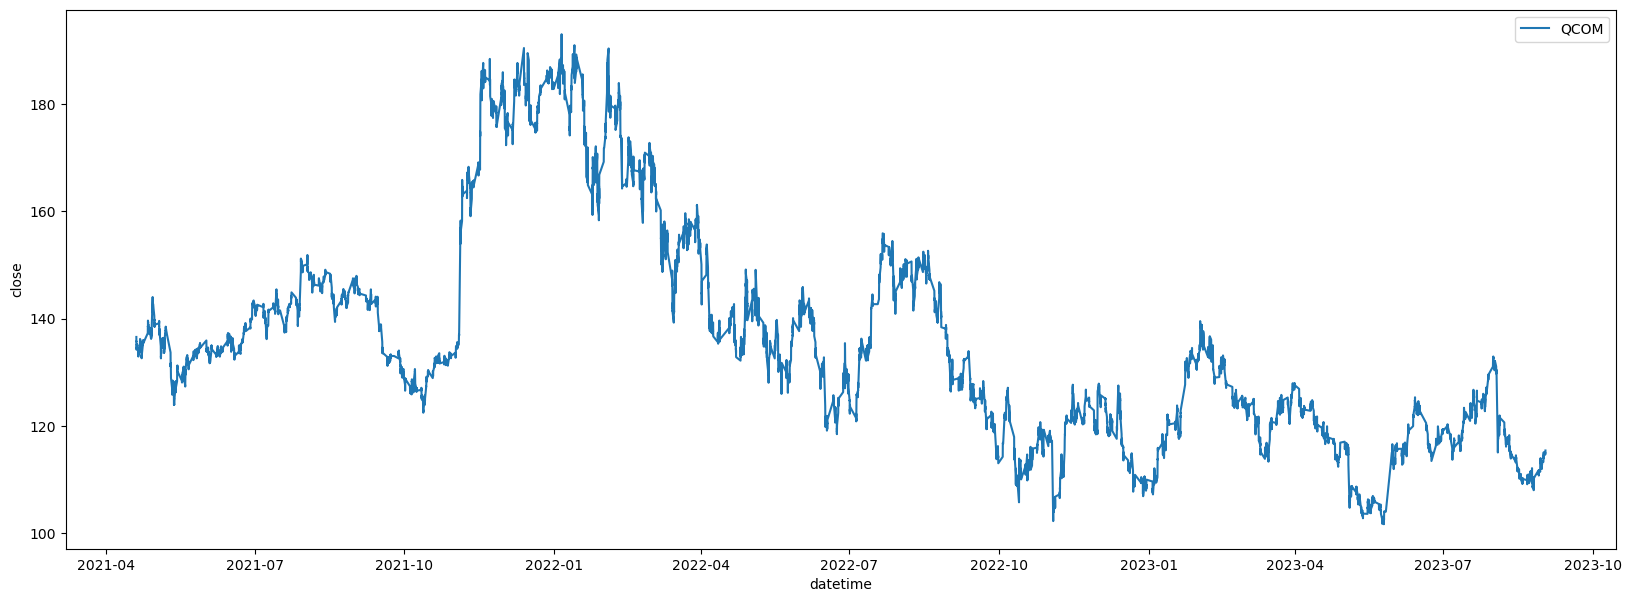

In [9]:
plt.figure(100, figsize=(20, 7))
for idx, stock in enumerate(stock_dfs):
    sns.lineplot(x = stock.datetime, y = "close", data = stock, palette="coolwarm", label=stock_tickers[idx]);

In [480]:
def compute_column_correlation_pct(dataframes, column='close', index='points_from_start'):
    merged_df = pd.concat(dataframes, ignore_index=True)

    pivoted_df = merged_df.pivot(index=index, columns='ticker', values=column)

    pct_change_df = pivoted_df.pct_change()

    correlation_matrix = pct_change_df.corr()

    return correlation_matrix

In [481]:
def compute_column_correlation(dataframes, column='close', index='points_from_start'):
    merged_df = pd.concat(dataframes, ignore_index=True)

    pivoted_df = merged_df.pivot(index=index, columns='ticker', values=column)

    correlation_matrix = pivoted_df.corr()

    return correlation_matrix

In [482]:
def rank_stocks_by_correlation(base_stock, dataframes, column='close', index='points_from_start'):
    merged_df = pd.concat(dataframes, ignore_index=True)

    base_stock_pct_change = base_stock[column].pct_change()

    ranked_stocks = {}

    for stock_df in dataframes:
        stock_ticker = stock_df.iloc[0].ticker
        stock_pct_change = stock_df[column].pct_change()
        stock_correlation = base_stock_pct_change.corr(stock_pct_change)
        ranked_stocks[stock_ticker] = stock_correlation

    ranked_stocks = pd.Series(ranked_stocks).sort_values(ascending=False)

    return ranked_stocks


In [483]:
corr_mat = compute_column_correlation_pct(stock_dfs)

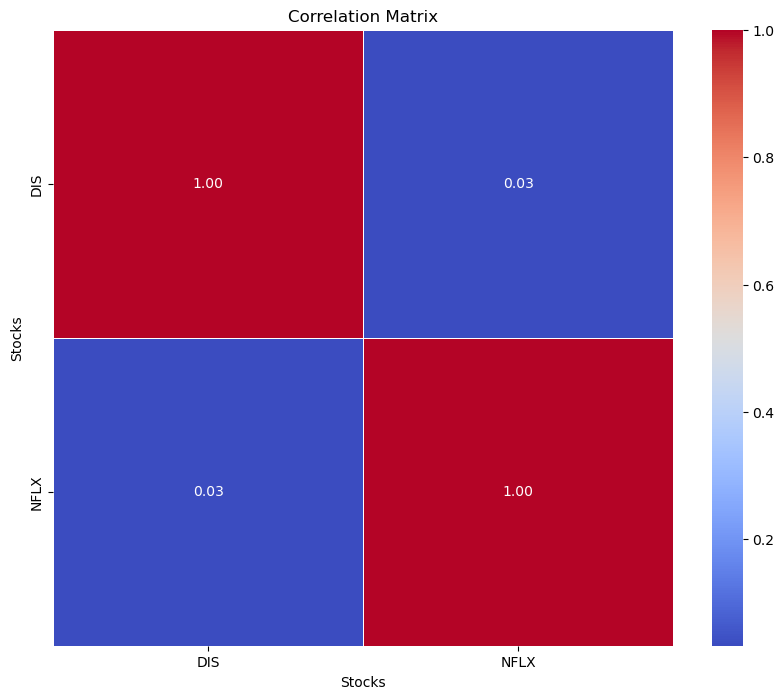

In [484]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

In [485]:
print(f'Correlations for {stock_tickers[0]}')
rank_stocks_by_correlation(stock_dfs[0], stock_dfs[1:])

Correlations for NFLX


DIS   0.03
dtype: float64